In [611]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft

Here I put all the functions I need

In [612]:
#This function computes the convolution of 2 arrays
def convolve(f,g):
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)
    return np.fft.irfft(F_f*F_g, f.size)

In [613]:
def array_shifter(f,shift):

    #Taking the modulo of the shift in case it exceed the lenght of our array
    shift = shift%f.size

    #Constructing g as explained in pdf
    g = np.zeros(f.size)
    g[shift] = 1

    #Doing the convolution of f and g
    return convolve(f,g)



In [614]:
def gaussian(x,mu,sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)

In [615]:
#This function computes the correlation function of 2 arrays
def correl_fct(f,g):
    F_f = np.fft.fft(f)
    F_g = np.fft.fft(g)
    return np.fft.irfft(F_f*np.conjugate(F_g), f.size)

In [616]:
def gaussian_correlator(y,shift):
    yshifted = array_shifter(y,shift)
    return correl_fct(y,yshifted)

Question 1

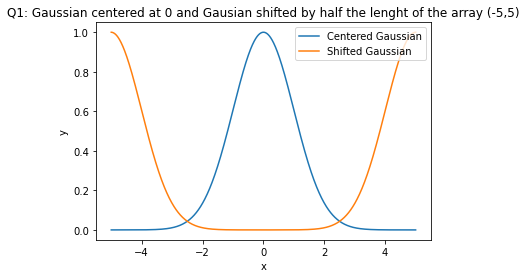

In [617]:
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
yshifted = array_shifter(y, int(len(y)/2))

plt.title("Q1: Gaussian centered at 0 and Gausian shifted by half the lenght of the array (-5,5)")
plt.plot(x,y, label="Centered Gaussian")
plt.plot(x,yshifted, label="Shifted Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Question 2

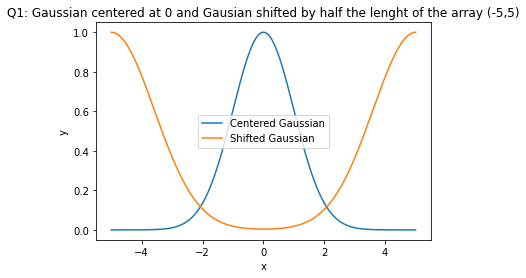

In [618]:
ycorell = correl_fct(y,y)
ycorell = ycorell/np.max(ycorell)

plt.title("Q1: Gaussian centered at 0 and Gausian shifted by half the lenght of the array (-5,5)")
plt.plot(x,y, label="Centered Gaussian")
plt.plot(x,ycorell, label="Shifted Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Question 2 c)

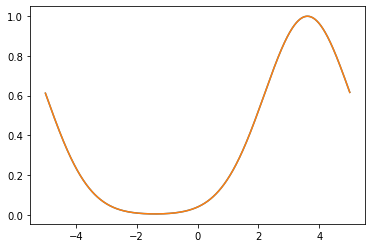

In [619]:
#taking the correlation of y and y shifted by n
# is equal to the correlation with itself shifted by len(x)-n
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
correl3 = gaussian_correlator(y,140)
correl3 /= max(correl3)

plt.plot(x,correl3)

test = correl_fct(y,y)
test /= max(test)
test = array_shifter(test,x.size-140)
plt.plot(x,test)

In [686]:
def safe_convolution(f,g):

    ldiff = f.size-g.size 

    if ldiff > 0:
        f_padding = np.zeros(f.size)
        g_padding = np.zeros(f.size + int(ldiff/2))
    else:
        f_padding = np.zeros(g.size+ int(np.abs(ldiff)/2))
        g_padding = np.zeros(g.size)

    f = np.append(f_padding,np.append(f,f_padding))
    g = np.append(g_padding,np.append(g,g_padding))

    if f.size != g.size:
        print("Error: The two array sizes cannot differ by an odd number")
    else:
        return convolve(f,g)


In [687]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

safe_convolution(x,y)

array([ 3.00000000e+02,  3.36000000e+02,  3.72000000e+02,  4.08000000e+02,
        4.27000000e+02,  4.28000000e+02,  4.10000000e+02,  3.72000000e+02,
        3.13000000e+02,  2.32000000e+02,  1.28000000e+02,  9.47390314e-15,
        9.47390314e-15, -9.47390314e-15,  0.00000000e+00,  0.00000000e+00,
        8.20464080e-15,  8.20464080e-15,  8.20464080e-15,  2.46139224e-14,
        1.09542005e-14,  6.54291436e-14,  3.01980663e-14,  5.92118946e-15,
        0.00000000e+00,  3.31586610e-14,  4.73695157e-15,  3.78956126e-14,
        0.00000000e+00,  3.78956126e-14,  0.00000000e+00,  0.00000000e+00,
       -8.20464080e-15, -8.20464080e-15, -8.20464080e-15, -2.46139224e-14,
        1.00000000e+00,  4.00000000e+00,  1.00000000e+01,  2.00000000e+01,
        3.50000000e+01,  5.60000000e+01,  8.40000000e+01,  1.20000000e+02,
        1.56000000e+02,  1.92000000e+02,  2.28000000e+02,  2.64000000e+02])